# Importing Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from torch_geometric.data import Data
import torch_geometric.nn as gnn # Import torch_geometric.nn as gnn Import Data from torch_geometric.data
from torch_geometric.loader import DataLoader

# Loading the data

In [2]:
# Load the dataset
data=pd.read_csv('data.csv')
data

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None


### Handling Null Values
First, we check if there are any null/missing values in the dataset. If any are present, we decide on an appropriate method to handle them, such as removal or imputation.



In [4]:
pd.set_option('display.max_rows', None)
data.isnull().sum()

hsi_id           0
0                0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8                0
9                0
10               0
11               0
12               0
13               0
14               0
15               0
16               0
17               0
18               0
19               0
20               0
21               0
22               0
23               0
24               0
25               0
26               0
27               0
28               0
29               0
30               0
31               0
32               0
33               0
34               0
35               0
36               0
37               0
38               0
39               0
40               0
41               0
42               0
43               0
44               0
45               0
46               0
47               0
48               0
49               0
50               0
51          

In [5]:
null_columns= data.columns[data.isnull().any()]
null_columns

Index([], dtype='object')

Hence, we conclude no null values exists in the dataset.

### Handling Duplicate Values
We check for duplicate records in the dataset. If any are found, we remove them to ensure data integrity.


In [7]:
for column in data.columns:
        duplicate_count = data[column].duplicated().sum()
        if duplicate_count > 0:
            print(f"\nColumn: {column}")
            print(f"Total duplicates: {duplicate_count}")

            # Find and print the most frequent duplicate values
            value_counts = data[column].value_counts()
            duplicate_values = value_counts[value_counts > 1]  # Values that repeat > 1 time
            if not duplicate_values.empty:
              print("Duplicate Values (and their counts):")
              print(duplicate_values)


Column: hsi_id
Total duplicates: 3
Duplicate Values (and their counts):
hsi_id
imagoai_corn_395    2
imagoai_corn_385    2
imagoai_corn_443    2
Name: count, dtype: int64

Column: vomitoxin_ppb
Total duplicates: 372
Duplicate Values (and their counts):
vomitoxin_ppb
0.0        88
200.0      41
300.0      27
500.0      25
100.0      24
400.0      22
800.0      12
600.0      11
1300.0     11
1200.0     10
900.0       9
1100.0      9
2100.0      7
1400.0      6
1000.0      6
8900.0      6
5300.0      5
700.0       5
86900.0     4
1900.0      4
2800.0      4
1500.0      4
4300.0      3
410.0       3
10.0        3
3100.0      3
90.0        3
3700.0      3
3500.0      3
5000.0      3
18000.0     3
1700.0      3
18100.0     3
280.0       3
1600.0      3
4500.0      3
2700.0      2
4700.0      2
30.0        2
2900.0      2
370.0       2
2400.0      2
4800.0      2
110.0       2
7000.0      2
6800.0      2
5200.0      2
220.0       2
7700.0      2
2500.0      2
4600.0      2
2600.0      2
570.

In [8]:
matching_rows=data[data['hsi_id'] == 'imagoai_corn_395']
pnb_values = matching_rows['vomitoxin_ppb']
pnb_values
matching_rows


,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
54,imagoai_corn_395,0.496301,0.479573,0.480461,0.477477,0.453247,0.476724,0.466602,0.443715,0.470380,...,0.814446,0.813131,0.812312,0.798008,0.817616,0.777920,0.804107,0.802259,0.789933,0.0
395,imagoai_corn_395,0.493367,0.504286,0.485930,0.471946,0.478705,0.473456,0.466760,0.470290,0.447366,...,0.791491,0.790374,0.814201,0.807443,0.811985,0.783479,0.797435,0.788128,0.814911,0.0


In [9]:
matching_rows=data[data['hsi_id'] == 'imagoai_corn_385']
pnb_values = matching_rows['vomitoxin_ppb']
pnb_values
matching_rows

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
308,imagoai_corn_385,0.393269,0.389350,0.357651,0.381475,0.348101,0.370259,0.345830,0.343851,0.349881,...,0.791989,0.781095,0.784565,0.785925,0.792714,0.796940,0.805238,0.797527,0.781207,300.0
385,imagoai_corn_385,0.385710,0.404904,0.345857,0.374159,0.363479,0.349988,0.354865,0.340398,0.369850,...,0.802557,0.799114,0.783101,0.776276,0.791921,0.797829,0.800767,0.785109,0.796771,300.0


In [10]:
matching_rows=data[data['hsi_id'] == 'imagoai_corn_443']
pnb_values = matching_rows['vomitoxin_ppb']
pnb_values
matching_rows

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
420,imagoai_corn_443,0.465689,0.461339,0.460432,0.432276,0.440023,0.454322,0.436480,0.440962,0.417962,...,0.769712,0.770580,0.761353,0.759335,0.766865,0.757690,0.789156,0.767399,0.772126,0.0
443,imagoai_corn_443,0.463710,0.473496,0.467616,0.458209,0.445803,0.429513,0.435986,0.426006,0.436493,...,0.767774,0.755153,0.757210,0.758560,0.770065,0.765849,0.777622,0.754967,0.751124,0.0


In [11]:
duplicate_hsi_ids = ['imagoai_corn_385', 'imagoai_corn_395', 'imagoai_corn_443']

# Create a list to store the merged rows
merged_rows = []

# Create a list to store rows to be dropped.
drop_index = []

# Iterate through the duplicate hsi_ids
for hsi_id in duplicate_hsi_ids:
    # Find rows with the current hsi_id
    matching_rows = data[data['hsi_id'] == hsi_id]

    if len(matching_rows) > 1:  # Check if there are duplicates
        # Calculate the mean of numeric columns
        numeric_cols = matching_rows.select_dtypes(include=['number']).columns
        mean_values = matching_rows[numeric_cols].mean()

        # Create a new row with the mean values
        new_row = pd.Series(dtype='object')  # Initialize an empty series

        for col in data.columns:
          if col in numeric_cols:
            new_row[col] = mean_values[col]
          elif col == 'hsi_id':
            new_row[col] = hsi_id
          else:
            new_row[col] = matching_rows[col].iloc[0] #take the first value of non-numeric col

        merged_rows.append(new_row)
        drop_index.extend(matching_rows.index)

# Create a new DataFrame with the merged rows
merged_df = pd.DataFrame(merged_rows)

# Drop the duplicate rows from the original DataFrame
data = data.drop(drop_index)

# Concatenate the merged DataFrame with the original DataFrame
data = pd.concat([data, merged_df], ignore_index=True)

print(data)

               hsi_id         0         1         2         3         4  \
0      imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293   
1      imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192   
2      imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056   
3      imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672   
4      imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026   
5      imagoai_corn_5  0.403326  0.399065  0.392410  0.393671  0.375779   
6      imagoai_corn_6  0.369181  0.398294  0.382156  0.355960  0.357118   
7      imagoai_corn_7  0.386569  0.408519  0.394123  0.394363  0.390526   
8      imagoai_corn_8  0.439140  0.432694  0.423883  0.421475  0.411783   
9      imagoai_corn_9  0.439308  0.430286  0.419468  0.402224  0.401832   
10    imagoai_corn_10  0.463650  0.465623  0.445566  0.411191  0.428212   
11    imagoai_corn_11  0.475149  0.454934  0.457425  0.451367  0.412615   
12    imagoai_corn_12  0.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [13]:
for column in data.columns:
        duplicate_count = data[column].duplicated().sum()
        if duplicate_count > 0:
            print(f"\nColumn: {column}")
            print(f"Total duplicates: {duplicate_count}")

            # Find and print the most frequent duplicate values
            value_counts = data[column].value_counts()
            duplicate_values = value_counts[value_counts > 1]  # Values that repeat > 1 time
            if not duplicate_values.empty:
              print("Duplicate Values (and their counts):")
              print(duplicate_values)


Column: vomitoxin_ppb
Total duplicates: 369
Duplicate Values (and their counts):
vomitoxin_ppb
0.0        86
200.0      41
300.0      26
500.0      25
100.0      24
400.0      22
800.0      12
600.0      11
1300.0     11
1200.0     10
900.0       9
1100.0      9
2100.0      7
1400.0      6
1000.0      6
8900.0      6
5300.0      5
700.0       5
86900.0     4
1900.0      4
2800.0      4
1500.0      4
4300.0      3
410.0       3
10.0        3
3100.0      3
90.0        3
3700.0      3
3500.0      3
5000.0      3
18000.0     3
1700.0      3
18100.0     3
280.0       3
1600.0      3
4500.0      3
2700.0      2
4700.0      2
30.0        2
2900.0      2
370.0       2
2400.0      2
4800.0      2
110.0       2
7000.0      2
6800.0      2
5200.0      2
220.0       2
7700.0      2
2500.0      2
4600.0      2
2600.0      2
570.0       2
3800.0      2
3600.0      2
5800.0      2
6300.0      2
6700.0      2
4200.0      2
180.0       2
4400.0      2
380.0       2
Name: count, dtype: int64


There were 3 hsi_id values that had one duplicate each. Thus we removed them to ensure no duplicate records remain in the dataset.

# Outlier Analysis

Now we'll check for outliers in the dataset


In [ ]:
data.describe(percentiles = [0.05,0.25,0.5,0.75,0.8,0.85,0.95,0.99,0.995])

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,...,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,0.443078,0.440692,0.433819,0.426083,0.418975,0.412352,0.405797,0.399749,0.393910,0.389606,...,0.740963,0.740552,0.740188,0.739509,0.739536,0.738489,0.737952,0.737327,0.737820,3429.985915
std,0.044718,0.045531,0.045678,0.046090,0.045382,0.044681,0.044487,0.043716,0.043627,0.043457,...,0.053489,0.053722,0.053833,0.053713,0.053474,0.053654,0.053985,0.054168,0.054313,13132.805478
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
5%,0.371740,0.370351,0.364494,0.358641,0.350331,0.343223,0.339328,0.331829,0.324429,0.322363,...,0.658520,0.658035,0.658266,0.658117,0.655404,0.653049,0.653044,0.649464,0.652992,0.000000
25%,0.410470,0.404186,0.397135,0.389046,0.382232,0.377312,0.369636,0.364840,0.360309,0.355338,...,0.702092,0.703541,0.702506,0.700549,0.701615,0.700560,0.698601,0.697838,0.699000,160.000000
50%,0.448943,0.442507,0.434175,0.424967,0.416857,0.411811,0.405414,0.397811,0.393759,0.386995,...,0.743825,0.745533,0.744454,0.743677,0.743054,0.743806,0.742963,0.744588,0.745681,500.000000
75%,0.480155,0.478793,0.473092,0.464904,0.459241,0.451521,0.444316,0.438047,0.431114,0.427026,...,0.777595,0.776078,0.776980,0.774677,0.775664,0.775457,0.775486,0.774445,0.774091,1700.000000
80%,0.485551,0.485634,0.477169,0.471615,0.464003,0.456585,0.449955,0.443260,0.436422,0.432511,...,0.783248,0.782802,0.783045,0.781049,0.781639,0.780520,0.781123,0.780679,0.778267,2800.000000
85%,0.491574,0.490130,0.482230,0.477493,0.470783,0.462061,0.456487,0.448586,0.441959,0.438226,...,0.789507,0.790018,0.786034,0.789666,0.786931,0.785977,0.786092,0.787756,0.785481,4300.000000


This shows that in almost every feature, we have a considerable difference between the 99.5th percentile and the max value. For simplicity, I'll remove the values that lie outside the range 1.5*IQR range on either side of the distribution.

Number of iterations: 6


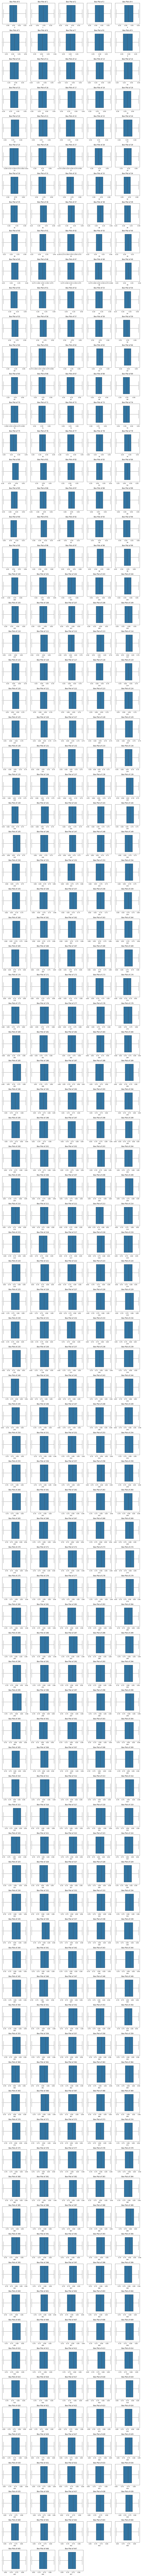


Final Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 0 to 496
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.5+ MB
None

First 5 rows of the final dataset:
           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   
5  imagoai_corn_5  0.403326  0.399065  0.392410  0.393671  0.375779  0.369329   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
3  0.458194  0.427737  0.415360  ... 

In [15]:
def remove_outlier_hsi_ids(data):
    """
    Removes hsi_ids with outlier values in wavelength columns iteratively.

    Args:
        data (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: DataFrame with outlier hsi_ids removed.
        int: Number of iterations.
    """
    iterations = 0
    while True:
        wavelength_cols = data.columns[1:-1]  # Exclude 'hsi_id' and 'vomitoxin_ppb'
        wavelength_data = data[wavelength_cols]

        numeric_wavelength_data = wavelength_data.select_dtypes(include=np.number)

        Q1 = numeric_wavelength_data.quantile(0.25)
        Q3 = numeric_wavelength_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        hsi_ids_with_outliers = []

        for column in numeric_wavelength_data.columns:
            outlier_rows = data[(data[column] < lower_bound[column]) | (data[column] > upper_bound[column])]
            if not outlier_rows.empty:
                for index, row in outlier_rows.iterrows():
                    hsi_ids_with_outliers.append(row['hsi_id'])

        if not hsi_ids_with_outliers:
            break  # No more outliers found

        mask = ~data['hsi_id'].isin(hsi_ids_with_outliers)
        data = data[mask]
        iterations += 1

    return data, iterations

# Apply the function
final_data, iterations = remove_outlier_hsi_ids(data.copy())  # Create a copy to avoid modifying the original

print(f"Number of iterations: {iterations}")

# Data visualization after outlier removal
wavelength_cols = final_data.columns[1:-1] #exclude hsi_id and target.
num_cols = len(wavelength_cols)

cols_per_row = 5
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 3, num_rows * 3))

axes = axes.flatten() if num_rows > 1 else axes

for i, column in enumerate(wavelength_cols):
    sns.boxplot(x=final_data[column], ax=axes[i])
    axes[i].set_title(f"Box Plot of {column}")
    axes[i].set_xlabel(column)

for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

# Print information about the final dataset
print("\nFinal Dataset Information:")
print(final_data.info())

# If you want to see the first few rows
print("\nFirst 5 rows of the final dataset:")
print(final_data.head())

In [16]:
data=final_data

# Visualization

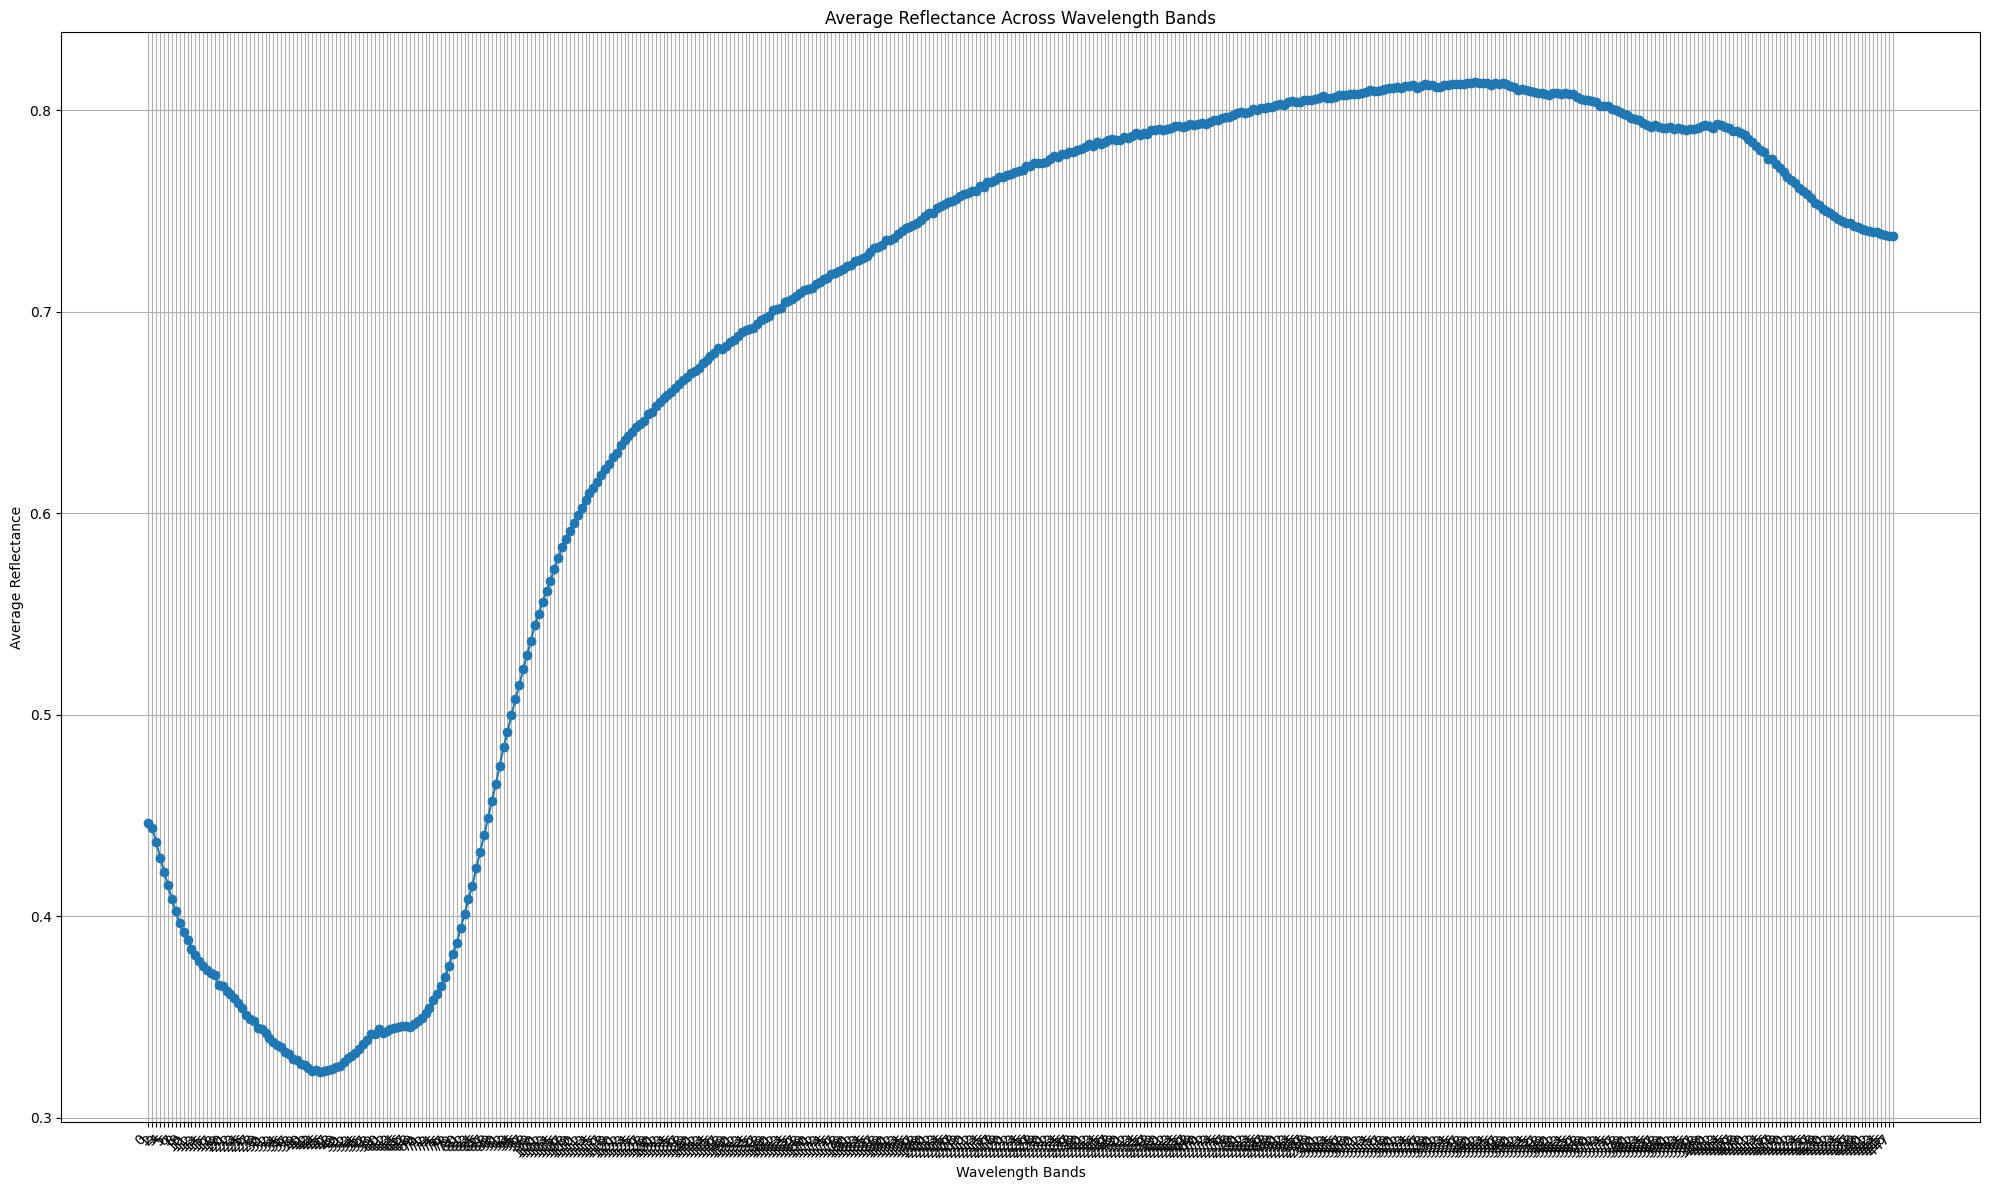

In [17]:
# Data visualization
plt.figure(figsize=(20, 12))
wavelegth_columns = data.columns[1:-1]
average_reflectance = data[wavelegth_columns].mean()
plt.plot(wavelegth_columns, average_reflectance, marker='o')
plt.title("Average Reflectance Across Wavelength Bands")
plt.xlabel("Wavelength Bands")
plt.ylabel("Average Reflectance")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(True)
plt.tight_layout()
plt.show()

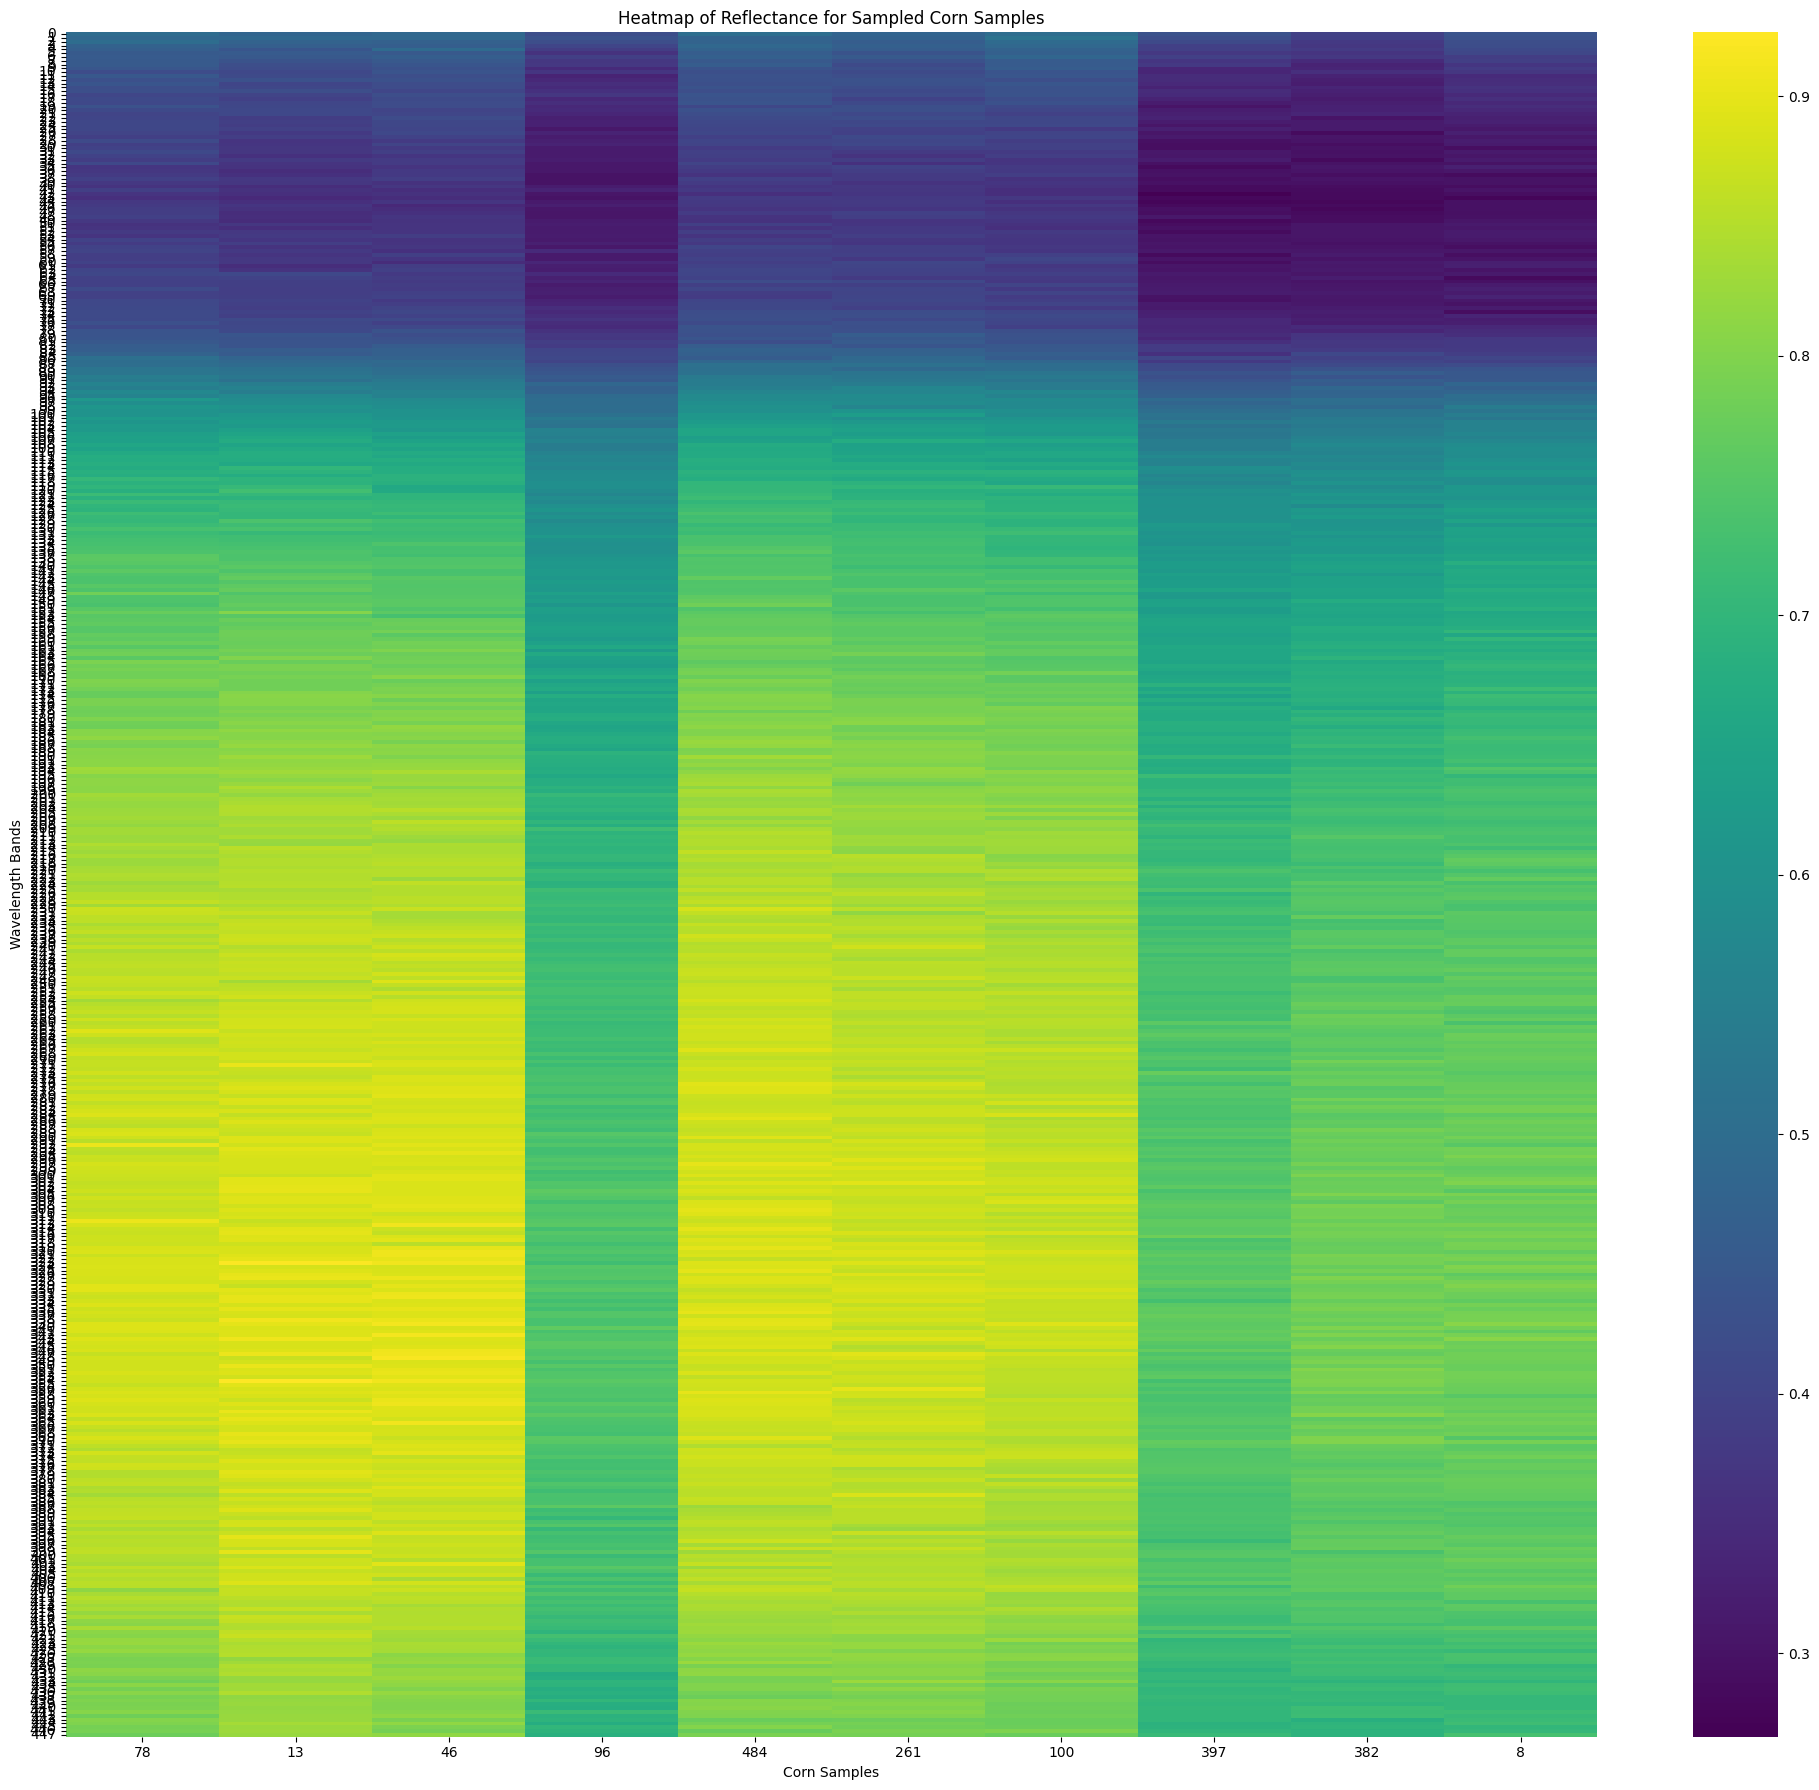

In [18]:
# Data visualization
sample_size=10
if len(data) > sample_size:
      sampled_data = data.sample(sample_size)
else:
      sampled_data = data

plt.figure(figsize=(20, 18))
sns.heatmap(sampled_data[wavelegth_columns].T, cmap="viridis",
                yticklabels=wavelegth_columns)
plt.title("Heatmap of Reflectance for Sampled Corn Samples")
plt.xlabel("Corn Samples")
plt.ylabel("Wavelength Bands")
plt.tight_layout()
plt.show()

# Normalization and PCA Reduction

Plotting the 3-d scatter plot

In [ ]:
# Apply dimensionality reduction
# Separate features (wavelength columns) and target
wavelength_cols = data.columns[1:-1]  # Exclude 'hsi_id' and 'vomitoxin_ppb'
features = data[wavelength_cols]
target = data['vomitoxin_ppb']  # Target variable

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=50)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components)


principal_df.columns = [f"pca_{i}" for i in range(principal_df.shape[1])]

# Add hsi_id and target variable back to principal_df
principal_df['hsi_id'] = data['hsi_id'].values
principal_df['vomitoxin_ppb'] = target.values


print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the principal component DataFrame
print(principal_df.head())

Explained Variance Ratio: [8.33674422e-01 6.81098289e-02 2.57978685e-02 1.28334288e-02
 3.05234624e-03 1.20450713e-03 6.71101825e-04 6.18490499e-04
 5.92048601e-04 5.77142927e-04 5.64071041e-04 5.49809603e-04
 5.39045971e-04 5.23090930e-04 5.17363629e-04 5.09197748e-04
 5.05757746e-04 4.95655174e-04 4.93746618e-04 4.89336289e-04
 4.82850117e-04 4.70707675e-04 4.67866230e-04 4.57699651e-04
 4.50243697e-04 4.47742207e-04 4.44156602e-04 4.40872409e-04
 4.35732254e-04 4.25948262e-04 4.20612139e-04 4.13612929e-04
 4.10843480e-04 4.08577211e-04 4.04319031e-04 3.96531301e-04
 3.94897991e-04 3.85762394e-04 3.84199724e-04 3.80703023e-04
 3.74805971e-04 3.73991352e-04 3.68694307e-04 3.66611867e-04
 3.63433937e-04 3.59501741e-04 3.51559872e-04 3.49876221e-04
 3.47814836e-04 3.44060463e-04]
       pca_0     pca_1     pca_2     pca_3     pca_4     pca_5     pca_6  \
0 -18.787162  2.621286  2.436563 -2.049859  0.387745  0.010314 -0.652583   
1 -18.700858  2.668765  0.687429 -0.666700 -0.409866 -0.36

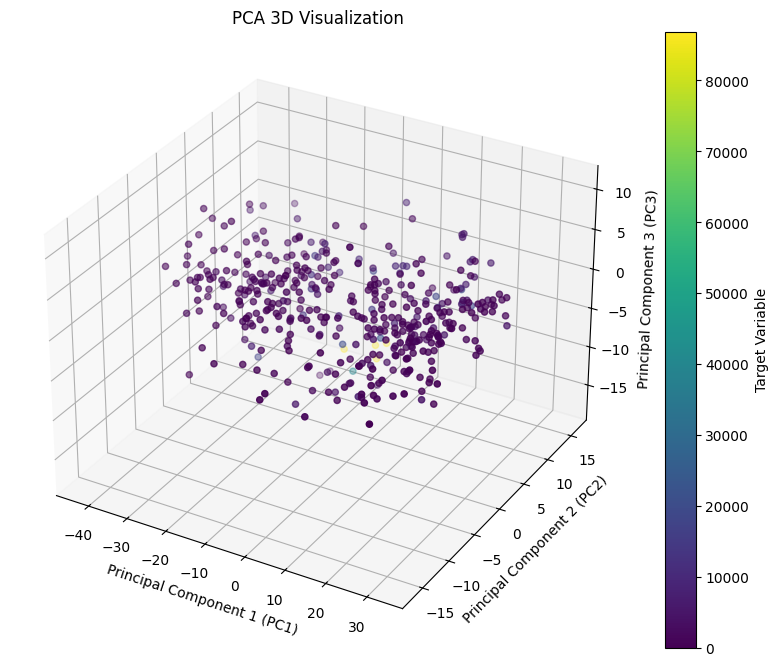

In [20]:
# Apply dimensionality reduction
# Separate features and target
wavelength_cols = data.columns[1:-1]
features = data[wavelength_cols]
target = data['vomitoxin_ppb'].values

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


pca_3d = PCA(n_components=3)  # Reduce to 3 components for visualization
principal_components_3d = pca_3d.fit_transform(scaled_features)
principal_df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])
principal_df_3d['target'] = target

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principal_df_3d['PC1'], principal_df_3d['PC2'], principal_df_3d['PC3'], c=principal_df_3d['target'], cmap='viridis')
ax.set_title('PCA 3D Visualization')
ax.set_xlabel('Principal Component 1 (PC1)')
ax.set_ylabel('Principal Component 2 (PC2)')
ax.set_zlabel('Principal Component 3 (PC3)')
fig.colorbar(scatter, label='Target Variable')
plt.show()


# Model Training

This section presents a comparative analysis of three models: LSTM, CNN, and GNN. All models underwent random search hyperparameter tuning to optimize their performance.

LSTM

Best RMSE: 9751.03966766517
Best Parameters: {'hidden_size': 120, 'lr': np.float64(0.009202880841373443), 'epochs': 196}
MAE: 2699.73300548082
RMSE: 9751.338039367192
R² Score: -0.018653987674696282


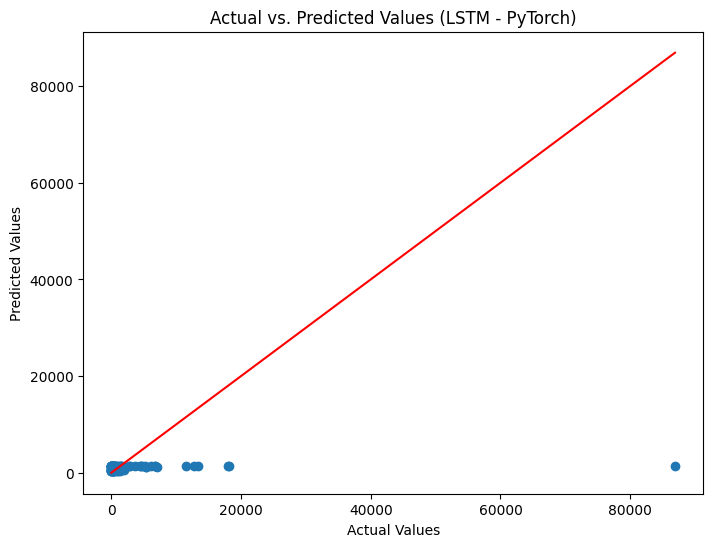


Model Performance and Limitations:
- The LSTM model (PyTorch) was trained on the top 3 principal components with tuned hyperparameters.
- MAE: 2699.73300548082, RMSE: 9751.338039367192, R² Score: -0.018653987674696282
- The model's performance may be limited by the reduced dimensionality and the complexity of the data.
- More complex LSTM architectures or other deep learning models may be explored.
- Consider the effect of outliers on the model.


In [ ]:
# Separate features and target
wavelength_cols = data.columns[1:-1]
features = data[wavelength_cols]
target = data['vomitoxin_ppb'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features.values, target, test_size=0.2, random_state=42
)

# Standardize features (AFTER SPLITTING)
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)
scaler_test = StandardScaler()
X_test_scaled = scaler_test.fit_transform(X_test)

# PCA to 3 components (AFTER SCALING AND SPLITTING)
pca_train = PCA(n_components=3)
X_train_pca = pca_train.fit_transform(X_train_scaled)
pca_test = PCA(n_components=3)
X_test_pca = pca_test.fit_transform(X_test_scaled)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define LSTM model using PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Define hyperparameter search space
param_dist = {
    'hidden_size': randint(20, 150),
    'lr': uniform(0.0001, 0.01),
    'epochs': randint(50, 200)
}

# Define a function to train and evaluate the model
def train_evaluate_model(hidden_size, lr, epochs):
    model = LSTMModel(3, hidden_size, 1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
        y_pred = y_pred_tensor.numpy()

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Perform random search
best_rmse = float('inf')
best_params = {}
n_iter = 50  # Number of random combinations to try

for i in range(n_iter):
    hidden_size = param_dist['hidden_size'].rvs()
    lr = param_dist['lr'].rvs()
    epochs = param_dist['epochs'].rvs()

    rmse = train_evaluate_model(hidden_size, lr, epochs)

    if rmse < best_rmse:
        best_rmse = rmse
        best_params = {'hidden_size': hidden_size, 'lr': lr, 'epochs': epochs}

print(f"Best RMSE: {best_rmse}")
print(f"Best Parameters: {best_params}")

# Train the final model with best parameters
best_model = LSTMModel(3, best_params['hidden_size'], 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(best_model.parameters(), lr=best_params['lr'])

for epoch in range(best_params['epochs']):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = best_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate the final model
best_model.eval()
with torch.no_grad():
    y_pred_tensor = best_model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Visualize results (scatter plot of actual vs. predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (LSTM - PyTorch)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

# Summarize model performance and limitations
print("\nModel Performance and Limitations:")
print("- The LSTM model (PyTorch) was trained on the top 3 principal components with tuned hyperparameters.")
print(f"- MAE: {mae}, RMSE: {rmse}, R² Score: {r2}")
print("- The model's performance may be limited by the reduced dimensionality and the complexity of the data.")
print("- More complex LSTM architectures or other deep learning models may be explored.")

CNN Model

Best RMSE: 6697.858029803795
Best Parameters: {'lr': np.float64(0.008367361956817579), 'epochs': 108}
MAE: 2471.72248548872
RMSE: 6974.433006908346
R² Score: 0.4789059914108268


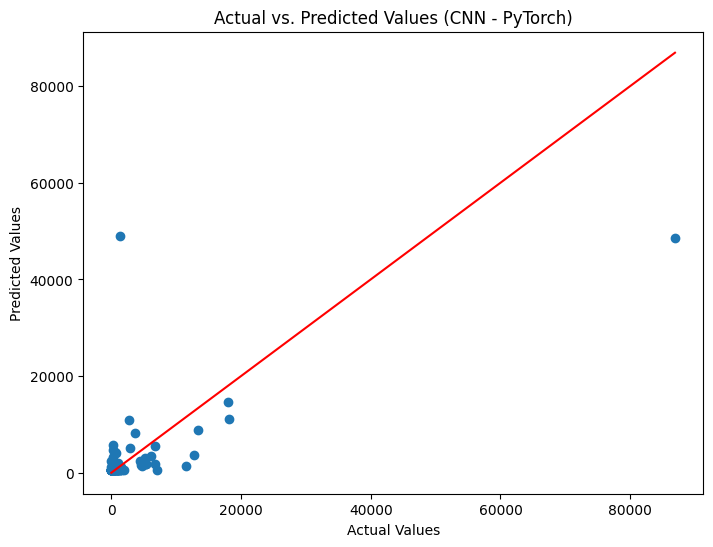


Model Performance and Limitations:
- The CNN model (PyTorch) was trained on the top 3 principal components with tuned hyperparameters.
- MAE: 2471.72248548872, RMSE: 6974.433006908346, R² Score: 0.4789059914108268
- The model's performance may be limited by the reduced dimensionality and the complexity of the data.
- More complex CNN architectures or other deep learning models may be explored.
- Consider the effect of outliers on the model.


In [ ]:
# Separate features and target
wavelength_cols = data.columns[1:-1]
features = data[wavelength_cols]
target = data['vomitoxin_ppb'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features.values, target, test_size=0.2, random_state=42
)

# Standardize features (AFTER SPLITTING)
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)
scaler_test = StandardScaler()
X_test_scaled = scaler_test.fit_transform(X_test)

# PCA to 3 components (AFTER SCALING AND SPLITTING)
pca_train = PCA(n_components=3)
X_train_pca = pca_train.fit_transform(X_train_scaled)
pca_test = PCA(n_components=3)
X_test_pca = pca_test.fit_transform(X_test_scaled)

# Convert to PyTorch tensors and reshape for CNN
X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32).unsqueeze(1) 
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define CNN model using PyTorch
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define hyperparameter search space
param_dist = {
    'lr': uniform(0.0001, 0.01),
    'epochs': randint(50, 200)
}

# Define a function to train and evaluate the model
def train_evaluate_model(lr, epochs):
    model = CNNModel()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
        y_pred = y_pred_tensor.numpy()

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Perform random search
best_rmse = float('inf')
best_params = {}
n_iter = 50  # Number of random combinations to try

for i in range(n_iter):
    lr = param_dist['lr'].rvs()
    epochs = param_dist['epochs'].rvs()

    rmse = train_evaluate_model(lr, epochs)

    if rmse < best_rmse:
        best_rmse = rmse
        best_params = {'lr': lr, 'epochs': epochs}

print(f"Best RMSE: {best_rmse}")
print(f"Best Parameters: {best_params}")

# Train the final model with best parameters
best_model = CNNModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(best_model.parameters(), lr=best_params['lr'])

for epoch in range(best_params['epochs']):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = best_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate the final model
best_model.eval()
with torch.no_grad():
    y_pred_tensor = best_model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Visualize results (scatter plot of actual vs. predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (CNN - PyTorch)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

# Summarize model performance and limitations
print("\nModel Performance and Limitations:")
print("- The CNN model (PyTorch) was trained on the top 3 principal components with tuned hyperparameters.")
print(f"- MAE: {mae}, RMSE: {rmse}, R² Score: {r2}")
print("- The model's performance may be limited by the reduced dimensionality and the complexity of the data.")
print("- More complex CNN architectures or other deep learning models may be explored.")

GNN

Best RMSE: 9753.501934749162
Best Parameters: {'hidden_dim': 58, 'lr': np.float64(0.009909636745737605), 'epochs': 65}
MAE: 3785.3180315682057
RMSE: 9756.295282252611
R² Score: -0.019689947819441445


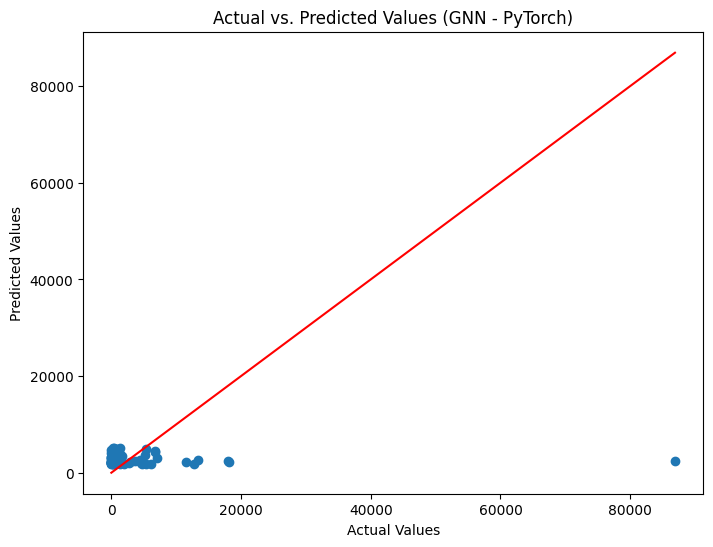


Model Performance and Limitations:
- The GNN model (PyTorch) was trained on the top 3 principal components with tuned hyperparameters.
- MAE: 3785.3180315682057, RMSE: 9756.295282252611, R² Score: -0.019689947819441445
- The model's performance may be limited by the reduced dimensionality and the complexity of the data.
- More complex GNN architectures or other deep learning models may be explored.
- Consider the effect of outliers on the model.


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features.values, target, test_size=0.2, random_state=42
)

# Standardize features (AFTER SPLITTING)
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)
scaler_test = StandardScaler()
X_test_scaled = scaler_test.fit_transform(X_test)

# PCA to 3 components (AFTER SCALING AND SPLITTING)
pca_train = PCA(n_components=3)
X_train_pca = pca_train.fit_transform(X_train_scaled)
pca_test = PCA(n_components=3)
X_test_pca = pca_test.fit_transform(X_test_scaled)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)



# Creating a "fully connected" graph
# where every node is connected to every other node.

def create_graph_data(X, y):
    num_nodes = X.shape[0]
    if num_nodes > 1: # Ensure at least two nodes for combinations
        edge_index = torch.combinations(torch.arange(num_nodes), r=2).t()
    else:
        edge_index = torch.empty((2,0), dtype=torch.long)  # Empty edge index if only one node
    return Data(x=torch.tensor(X, dtype=torch.float32), 
                y=torch.tensor(y, dtype=torch.float32).unsqueeze(1), 
                edge_index=edge_index)

train_data = create_graph_data(X_train_pca, y_train)
test_data = create_graph_data(X_test_pca, y_test)

# Create DataLoader (PyTorch Geometric uses a different DataLoader)
from torch_geometric.loader import DataLoader
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False) 

# Define GNN model using PyTorch Geometric
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = gnn.GCNConv(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.conv2 = gnn.GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        x = self.relu(x)
        x = self.fc(x)
        return x

# Define hyperparameter search space
param_dist = {
    'hidden_dim': randint(16, 64),
    'lr': uniform(0.0001, 0.01),
    'epochs': randint(50, 200)
}

# Define a function to train and evaluate the model
def train_evaluate_model(hidden_dim, lr, epochs):
    model = GNNModel(input_dim=X_train_pca.shape[1], hidden_dim=hidden_dim, output_dim=1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        for data in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, data.y)
            loss.backward()
            optimizer.step()

    model.eval()
    preds = []  # Initialize the preds list
    with torch.no_grad():
        for data in test_loader:
            outputs = model(data)
            preds.append(outputs.cpu().numpy())  # Move to CPU before converting to numpy
    y_pred = np.concatenate(preds, axis=0)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Perform random search
best_rmse = float('inf')
best_params = {}
n_iter = 50  # Number of random combinations to try

for i in range(n_iter):
    hidden_dim = param_dist['hidden_dim'].rvs()
    lr = param_dist['lr'].rvs()
    epochs = param_dist['epochs'].rvs()

    rmse = train_evaluate_model(hidden_dim, lr, epochs)

    if rmse < best_rmse:
        best_rmse = rmse
        best_params = {'hidden_dim': hidden_dim, 'lr': lr, 'epochs': epochs}

print(f"Best RMSE: {best_rmse}")
print(f"Best Parameters: {best_params}")

# Train the final model with best parameters
best_model = GNNModel(input_dim=X_train_pca.shape[1], hidden_dim=best_params['hidden_dim'], output_dim=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(best_model.parameters(), lr=best_params['lr'])

for epoch in range(best_params['epochs']):
    for data in train_loader:
        optimizer.zero_grad()
        outputs = best_model(data)
        loss = criterion(outputs, data.y)
        loss.backward()
        optimizer.step()

# Evaluate the final model
best_model.eval()
preds = []  # Initialize the preds list
with torch.no_grad():
    for data in test_loader:
        outputs = best_model(data)  # Use best_model here!
        preds.append(outputs.cpu().numpy())  # Move to CPU before converting to numpy
    y_pred = np.concatenate(preds, axis=0)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Visualize results (scatter plot of actual vs. predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (GNN - PyTorch)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

# Summarize model performance and limitations
print("\nModel Performance and Limitations:")
print("- The GNN model (PyTorch) was trained on the top 3 principal components with tuned hyperparameters.")
print(f"- MAE: {mae}, RMSE: {rmse}, R² Score: {r2}")
print("- The model's performance may be limited by the reduced dimensionality and the complexity of the data.")
print("- More complex GNN architectures or other deep learning models may be explored.")

*Special Case:* While the primary focus was on deep learning models (LSTM, CNN, GNN), a Random Forest model was also implemented. Notably, this model yielded the highest R² score, surpassing the performance of all deep learning architectures tested.

MAE: 1933.7995505617978
RMSE: 4963.591768714409
R² Score: 0.7360690158594398


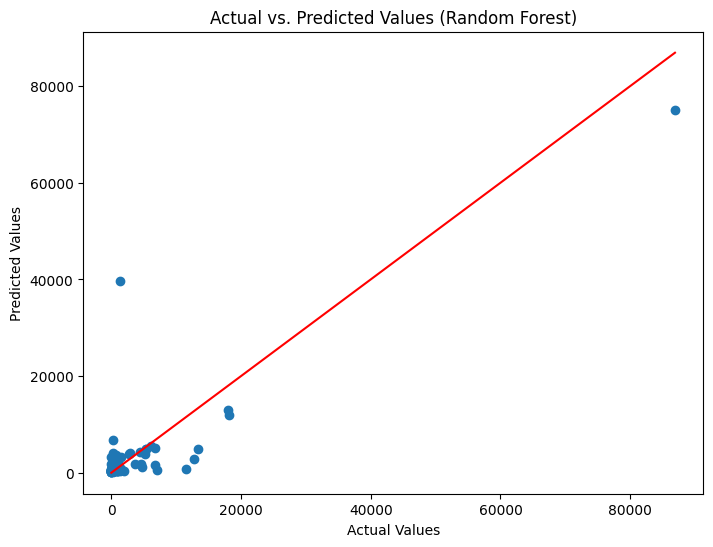


Model Performance and Limitations:
- The Random Forest model was trained on the top 3 principal components.
- MAE: 1933.7995505617978, RMSE: 4963.591768714409, R² Score: 0.7360690158594398
- The model's performance may be limited by the reduced dimensionality and the complexity of the data.
- Hyperparameter tuning (e.g., n_estimators, max_depth, min_samples_split) could potentially improve performance.
- Feature importance analysis could provide insights into the most relevant principal components.
- Consider the effect of outliers on the model.


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    principal_df_3d[['PC1', 'PC2', 'PC3']].values, target, test_size=0.2, random_state=42
)

# Create and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Visualize results (scatter plot of actual vs. predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Random Forest)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Add line for perfect predictions
plt.show()

# Summarize model performance and limitations
print("\nModel Performance and Limitations:")
print("- The Random Forest model was trained on the top 3 principal components.")
print(f"- MAE: {mae}, RMSE: {rmse}, R² Score: {r2}")
print("- The model's performance may be limited by the reduced dimensionality and the complexity of the data.")
print("- Hyperparameter tuning (e.g., n_estimators, max_depth, min_samples_split) could potentially improve performance.")
print("- Feature importance analysis could provide insights into the most relevant principal components.")